# Introduction to Data Science – Homework 4 - 2025
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 7, 2025, 11:59pm.

In this homework, you will study Salt Lake City air quality data and complete an A/B test comparing two ads. 

## Your Data
Fill out the following information: 

*First Name:*   Andrea

*Last Name:*    Stofko

*E-mail:*       andrea.stofko@utah.edu

*UID:*          u6040357


In [147]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Part 1: SLC Air Quality Index 

In this problem, you'll study the Air Quality in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://www.airnow.gov/aqi/aqi-basics) and the 
[AirNow](https://www.airnow.gov/about-airnow) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
+ Pollutant = PM2.5
+ Year = 2024
+ City = Salt Lake City, UT
+ Monitor Site = All Sites



Rename the file to SLC_PM2.5.csv

### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,3,4,5) and different sites.

In [148]:
#load data - will name this aqi
aqi = pd.read_csv("ad_viz_plotval_data.csv")
aqi.head(2)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2024,AQS,490352005,1,33.6,ug/m3 LC,97,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2024,AQS,490352005,1,28.3,ug/m3 LC,87,Copper View,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [149]:
#inspect data
aqi.shape
#aqi.describe()

(6871, 22)

In [5]:
#view all columns
print(aqi.columns.tolist())

['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']


In [150]:
#view datatypes
print(aqi.dtypes)

Date                               object
Source                             object
Site ID                             int64
POC                                 int64
Daily Mean PM2.5 Concentration    float64
Units                              object
Daily AQI Value                     int64
Local Site Name                    object
Daily Obs Count                     int64
Percent Complete                  float64
AQS Parameter Code                  int64
AQS Parameter Description          object
Method Code                       float64
Method Description                 object
CBSA Code                           int64
CBSA Name                          object
State FIPS Code                     int64
State                              object
County FIPS Code                    int64
County                             object
Site Latitude                     float64
Site Longitude                    float64
dtype: object


In [151]:
#convert date to datetime
aqi['Date'] = pd.to_datetime(aqi['Date'])
#aqi.dtypes - check is good

In [152]:
#there are some nulls values - view which columns
aqi.isnull().sum()

Date                               0
Source                             0
Site ID                            0
POC                                0
Daily Mean PM2.5 Concentration     0
Units                              0
Daily AQI Value                    0
Local Site Name                    0
Daily Obs Count                    0
Percent Complete                   0
AQS Parameter Code                 0
AQS Parameter Description          0
Method Code                       15
Method Description                15
CBSA Code                          0
CBSA Name                          0
State FIPS Code                    0
State                              0
County FIPS Code                   0
County                             0
Site Latitude                      0
Site Longitude                     0
dtype: int64

Method code and method description don't seem like variables that will affect our analysis. Leave those rows in for now, but we'll maybe remove them a little later.

### Task 1.3. Plot the data

1. The data contains multiple PM2.5 concentration and AQI entries for the same date measured at different sites and with different sensors (POCS). Plot average PM2.5 and AQI values with respect to date in a single figure. Anyone analysing the graph should be able to answer, what is the average PM 2.5 concentration or the AQI value on a particular date. 

2. Plot the average PM 2.5 concentration vs Date for two different sites (site ids - 490353015 and 490450004). Note in this case the average is just taken over POCs. Plot for both the sites should be in a single figure.
*Hint*: use the pandas groupby function


#### 1.3.1 Mean AQI and PM2.5

In [153]:
#subset data

#PM2.5
pm_dates = aqi[["Date","Daily Mean PM2.5 Concentration"]] #subset data for date and [PM2.5]
meanPM = pm_dates.groupby("Date").mean().reset_index() #get mean of PM conc for each date

#aqi
aqi_dates = aqi[["Date", "Daily AQI Value"]] #get date and corresponding AQIs
meanAQI = aqi_dates.groupby("Date").mean().reset_index() #take mean of each date

#meanPM.shape # (366, 2)
#meanPM.head()
meanAQI.head()

,Date,Daily AQI Value
0,2024-01-01,90.105263
1,2024-01-02,76.157895
2,2024-01-03,60.894737
3,2024-01-04,54.842105
4,2024-01-05,21.368421


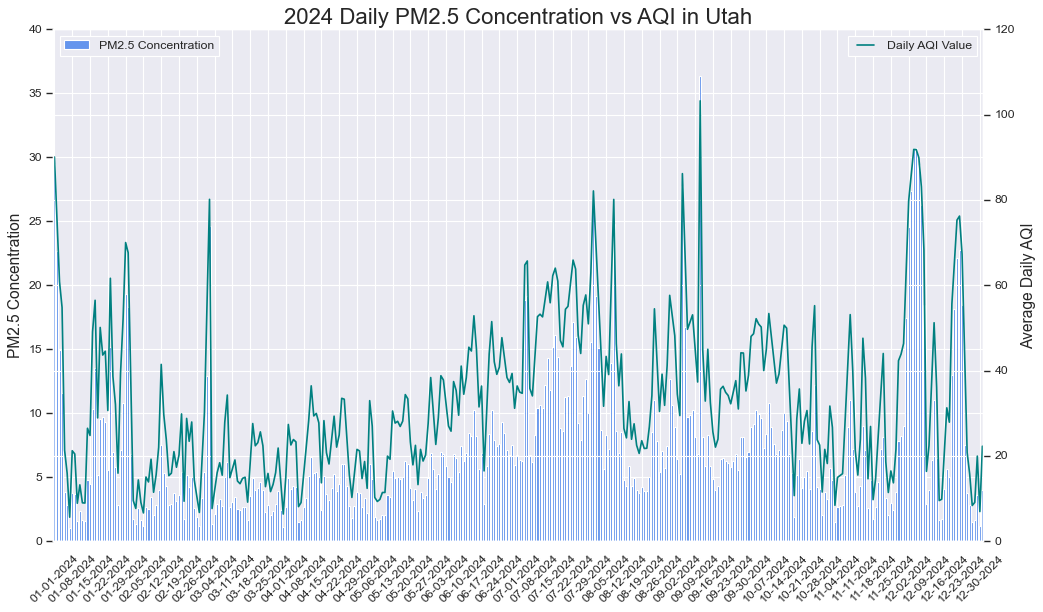

In [160]:
#plot mean PM2.5 and AQI per day

#set up figure dimensions
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(meanPM['Date'], meanPM['Daily Mean PM2.5 Concentration'], color = 'cornflowerblue')

#PM2.5 specifications
ax.set_ylabel("PM2.5 Concentration", fontsize = 14)
ax.legend(["PM2.5 Concentration"],loc = "upper left")

#add second line for AQI means/day
ax2 = ax.twinx() #same x different y axis
ax2.plot(meanAQI['Date'], meanAQI["Daily AQI Value"], color = 'teal')
ax2.set_ylabel("Average Daily AQI", fontsize = 14)
ax2.legend(["Daily AQI Value"],loc = "upper right")

#plot layout specifications
ax.set_xticks(meanPM['Date'][::7]) #add ticks
ax.set_xticklabels(meanPM['Date'][::7].dt.strftime('%m-%d-%Y'), rotation = 45) #change formatting from df
plt.title("2024 Daily PM2.5 Concentration vs AQI in Utah", fontsize = 20)
plt.show()

#### 1.3.3 Plot the average PM 2.5 concentration vs Date for two different sites (site ids - 490353015 and 490450004). Note in this case the average is just taken over POCs. Plot for both the sites should be in a single figure.

In [57]:
#create subset of data with just the site IDs listed
site1 = aqi[['Date', 'Site ID', 'Daily Mean PM2.5 Concentration']].loc[(aqi["Site ID"] == 490353015)].reset_index(drop=True)
site2 = aqi[['Date', 'Site ID', 'Daily Mean PM2.5 Concentration']].loc[(aqi["Site ID"] == 490450004)].reset_index(drop=True)
site1.head()

,Date,Site ID,Daily Mean PM2.5 Concentration
0,2024-01-01,490353015,38.0
1,2024-01-02,490353015,30.3
2,2024-01-03,490353015,19.4
3,2024-01-04,490353015,12.5
4,2024-01-05,490353015,5.3


In [58]:
#create df with means
site1_mean = site1.groupby("Date")[["Daily Mean PM2.5 Concentration"]].mean().reset_index()
site2_mean = site2.groupby("Date")[["Daily Mean PM2.5 Concentration"]].mean().reset_index()
site1_mean.head()
#site2_mean.head()

,Date,Daily Mean PM2.5 Concentration
0,2024-01-01,36.80
1,2024-01-02,28.70
2,2024-01-03,18.15
3,2024-01-04,11.70
4,2024-01-05,4.15


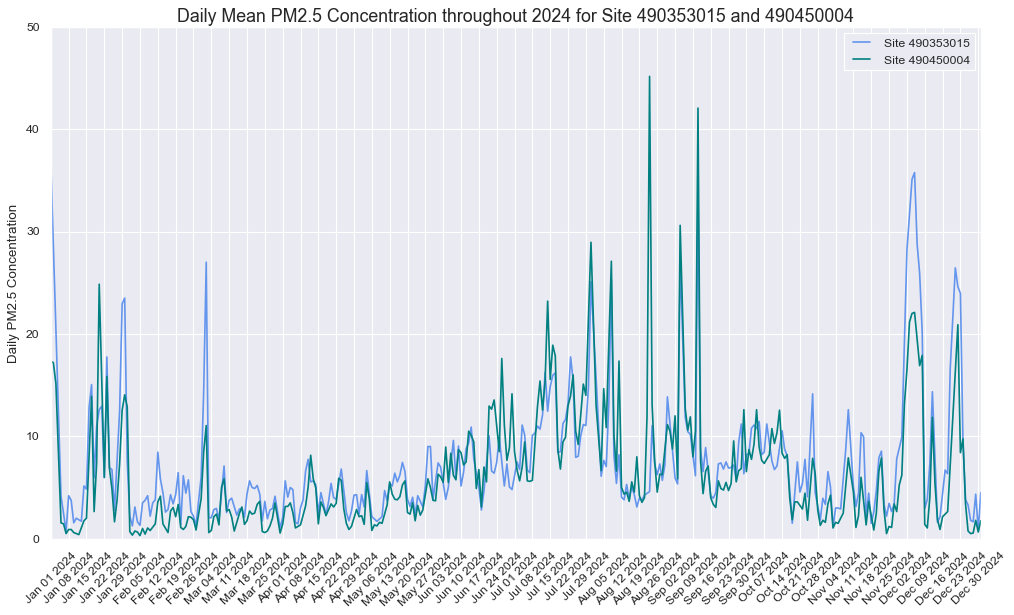

In [193]:
#plot data for PM2.5 concentration for the two sites:
from matplotlib import ticker
#from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
#import matplotlib.dates as mdates

#set up plot
fig = plt.subplots(figsize = (15,8))
plt.plot(site1_mean['Date'], site1_mean['Daily Mean PM2.5 Concentration'], color = 'cornflowerblue', label = 'Site 490353015')
plt.plot(site1_mean['Date'], site2_mean['Daily Mean PM2.5 Concentration'], color = 'teal', label = 'Site 490450004')
plt.ylabel("Daily PM2.5 Concentration")
plt.legend()

#plot specifications
#plt.minorticks_on() 
plt.xticks(site1_mean['Date'][::7], rotation = 45)
plt.title("Daily Mean PM2.5 Concentration throughout 2024 for Site 490353015 and 490450004", fontsize = 16)
plt.show()

## Part 2: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new slogan. The marketing department designed two slogans: ‘Slogan A’ and ‘Slogan B’, shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which slogan is better. 


You decide to conduct the following experiment. You use Instagram ads to buy 12000 impressions. In $N_A=6000$ of the ads (randomly chosen), you use Slogan A and in the other $N_B=6000$ ads, you use Slogan B. Then you see which slogan attracts more clicks.

It turns out that $n_A=1700$ Slogan A viewers click on the ad while $n_B=2100$ Slogan B viewers click on the ad. Obviously Slogan B did better in this test, but is the difference *significant* enough to say that Slogan B is better? Or, perhaps, Slogan B just got lucky in this test? 

The goal of this exercise will be to conduct a two-proportion z-test to determine if Slogan B is better. The steps will be similar to those from Lecture 7 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis 

Let $p_A = n_A/N_A$ be the proportion of clicks on Slogan A and similiarly $p_B$ be the proportion of clicks on Slogan B. In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis. 

**Your Solution:** 

Assuming $p_A$ is the proportion of clicks on Slogan A and $p_B$ is the proportion of clicks on Slogan B the null and alternate hypothesis are as follows:

$H_0\colon p_B \leq p_A,$
The proportion of clicks was not significantly different between Slogan A and Slogan B. Slogan B did not create a greater effect.

$H_A\colon p_B$ $>$ $p_A,$ Slogan B was more effective in generating clicks than Slogan A. Its proportion was significantly greater.

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 


Find the two-proportion z-value.

Results:

Slogan A: $ N_A = 6000$, $n_A=1700$

Slogan B: $ N_B = 6000$, $n_B=2100$


In [191]:
#find two-proportion z-value using formula above

import math

#define known results
NA = 6000
na = 1700
NB = 6000
nb = 2100

#define variables that are needed to find Z value
pa = na/NA
pb = nb/NB
ph = (pa * (NA/(NA+NB))) + (pb * (NB/(NB+NA)))
qh = 1 - ph

#write out equation and solve for two proportion z value
z = (pa - pb)/ (math.sqrt((ph * qh * (1/NA + 1/NB))))

#print value
print(f"The z value is {z}")

The z value is -7.849678864759114


### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test. Do this first using the normal cdf function and then check your answer by running a two proportions z-test in python with the proportions_ztest function. 

In [192]:
#import packages:
from scipy.stats import norm

#using normal cdf function
p_norm = 1-norm.cdf(abs(z))#p-value is 1-CDF
print("The p-value for the hypthoesis test is", p_norm)

The p-value for the hypthoesis test is 2.1094237467877974e-15


In [183]:
#using proportions_ztest
from statsmodels.stats.proportion import proportions_ztest
counts = [1700, 2100] #define counts
sample_sizes = [6000, 6000] #define sample size
z, pval = proportions_ztest(counts, sample_sizes,alternative='smaller') #alt hypthosis is that pa is smaller
print(f"The Z value is{z}, and the p-value is {pval}")

The Z value is-7.849678864759114, and the p-value is 2.0855195745306026e-15


These results indicate that the proportions are significantly different. We can reject the null hypothesis and conclude that Slogan B did have a significantly greater proportion of clicks than Slogan A.